<a href="https://colab.research.google.com/github/Kaushal-Top5699/classification_NN_tensorflow/blob/main/classification_NN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Classification with Tensorflow.**
Introduction to Neural Network Classification with **TensorFlow**. In a classification problem you try to classify something as one thing or another.

A few types,
1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

In [1]:
# Creating sample/toy data.
from sklearn.datasets import make_circles
# Make 1000 exmaples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Lets visualise the data.
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


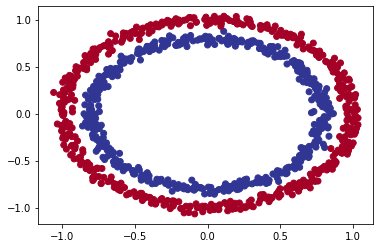

In [5]:
# Visualise with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

### **Input and output shapes.**

In [6]:
# Checking the shapes of features and labels.
X.shape, y.shape
# y is scalar therefore, no dimension output here.

((1000, 2), (1000,))

In [7]:
# How many samples we are working with.
len(X), len(y)

(1000, 1000)

In [8]:
# View 1st example features and label.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Building a Model**

In [ ]:
import tensorflow as tf

# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_1.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
# To improve our model, lets run it for longer.
model_1.fit(X, y, epochs = 200, verbose = 0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

We got an accuracy of just 50%, therefore, let's add an extra layer and up notch the things.

In [ ]:
# Model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [ ]:
model_2.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5560


[0.6934075951576233, 0.5559999942779541]

Looks like we just got an increment by 1. Lets try ruuning it for more epochs.

In [ ]:
model_2.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932273507118225, 0.5]

### To improve our model we need make some changes namely, adding extra layers, neurons or changing the optimizer.

In [ ]:
# Model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3.fit(X, y, epochs = 100)

In [ ]:
model_3.evaluate(X, y) 

32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939651370048523, 0.5]

In [ ]:
model_3.predict(X)

Now since, we are still getting the same result even after improving our model, its a good idea to visualize the model.

1. Function that takes in trained model's (X) features and (y) labels.
2. Create meshgrid of different X values.
3. Make predictions across meshgrid.
4. Plot the predictions as well as line between zeros(where each unique class falls).


In [9]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the aixs boundaries of the plot and create a meshgrid.
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values.
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
   
  # Make predictions.
  y_pred = model.predict(x_in)

  # Check for multi-class.
  if len(y_pred[0] > 1):
    print("Multi-Class Classification")
    # If so we have to reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary.
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


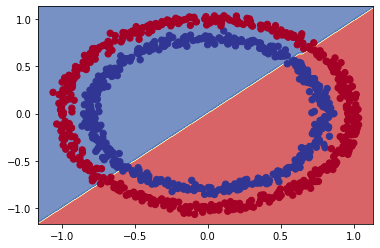

In [ ]:
plot_decision_boundary(model_3, X = X, y = y)

The data above is non-linear which in simple language is non-straight. However, before we fit our model, make sure that the loss function is mae or mse, the above model has a BinaryCrossenrtopy() as loss function.

In [11]:
# Lets see if our model can be used for regression problem.
import tensorflow as tf
tf.random.set_seed(42)

# Create a regression data.
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Splitting data into training and testing.
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Re-creating our model 3.
tf.config.run_functions_eagerly(True)
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [ ]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

In [ ]:
# Fitting our model to regression data.
model_4.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs = 100)

In [ ]:
model_4.evaluate(X_reg_train, y_reg_train)

5/5 [==============================] - 0s 11ms/step - loss: 37.3472 - mae: 37.3472


[37.34720230102539, 37.34720230102539]

2/2 [==============================] - 0s 8ms/step


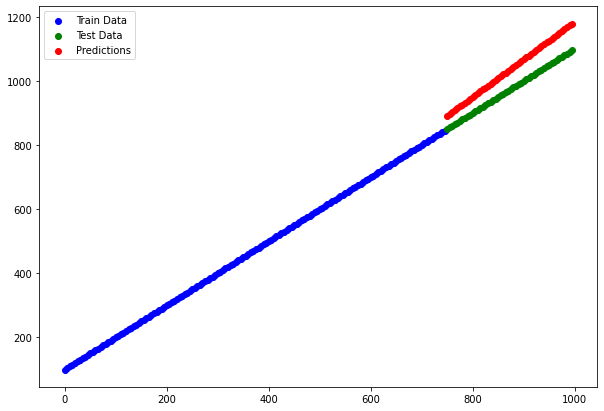

In [ ]:
# Make predictions.
y_reg_pred = model_4.predict(X_reg_test)

# Plot the predictions.
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Train Data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test Data")
plt.scatter(X_reg_test, y_reg_pred, c = "r", label = "Predictions")
plt.legend()

The missing piece: Non-linearity

In [ ]:
# Setting random seed.
tf.random.set_seed(42)

# 1. Creat model.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# 2. compile.
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
# Fit the model.
history = model_4.fit(X, y, epochs = 100, verbose = 0)

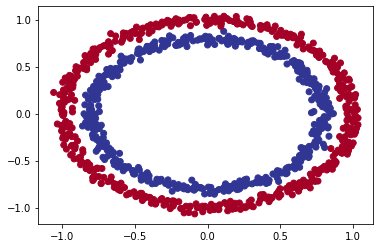

In [ ]:
# Check our data.
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


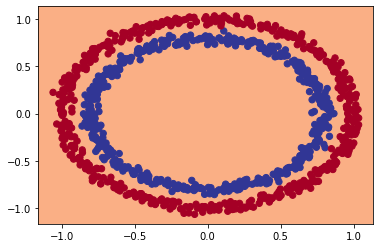

In [ ]:
plot_decision_boundary(model_4, X = X, y = y)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
# Lets trying adding the first non-linear activation "reLU"

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

histroy = model_5.fit(X, y, epochs = 100)

### Still our model is not performing well! Its still not learning and its seems like its just guessing.

In [ ]:
# Lets try increasing the number of units in our hidden layer.
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = tf.keras.activations.relu)
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_6.fit(X, y, epochs = 100)

313/313 [==============================] - 1s 2ms/step
Multi-Class Classification


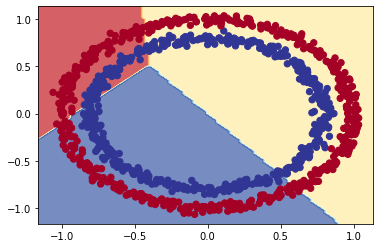

In [ ]:
plot_decision_boundary(model_6, X = X, y = y)

In [ ]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 11ms/step - loss: 1.5522 - accuracy: 0.3390


[1.5522265434265137, 0.33899998664855957]

Looks like our model is improving...
Lets now try adding one more hidden layer with 2 units.

In [ ]:
# Multi-Layer Neural Network.
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
histroy_2 = model_7.fit(X, y, epochs = 350)

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 14ms/step - loss: 0.0436 - accuracy: 0.9890


[0.04360446333885193, 0.9890000224113464]

313/313 [==============================] - 1s 3ms/step
Multi-Class Classification


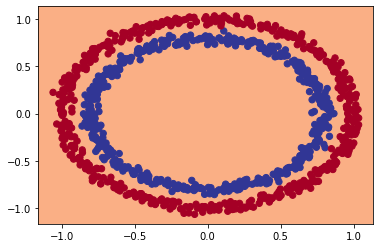

In [ ]:
plot_decision_boundary(model_7, X=X, y=y)

### **It looks like for output layer in Binary Classification we have to use an activaion function called sigmoid. Lets re-build our model with this add-on.**

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
history = model_8.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931496858596802, 0.5]

### **This is awesome! Just by adding an ouput activation (Sigmoid) we have finally achived an accuracy of 99%. Lets visualize it.**

313/313 [==============================] - 1s 3ms/step
Multi-Class Classification


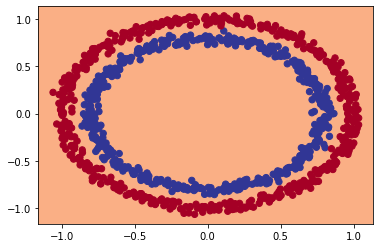

In [ ]:
plot_decision_boundary(model_8, X, y)

In [12]:
# The above plot_decision_boundary() function has some as seen above therefore, we re-created it.

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## **Perfect seperation!**

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


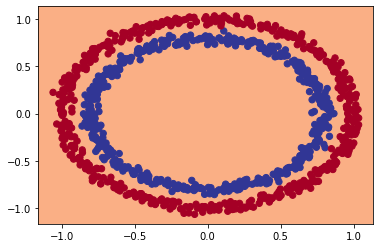

In [ ]:
plot_decision_boundary(model_8, X, y)

### Now note that we have trained our model a dataset and big idea over here is that we have tested it on the same data!

In [13]:
# Creating a toy tensor.
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

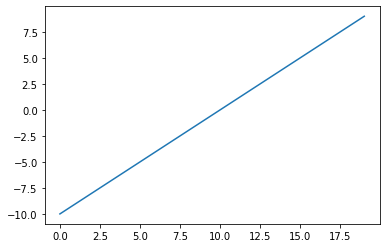

In [14]:
plt.plot(A)

In [15]:
# Lets start replicating sigmoid activation functions -- sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [16]:
# Using sigmoid function on A.
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Lets check how a sigmoid looks like.

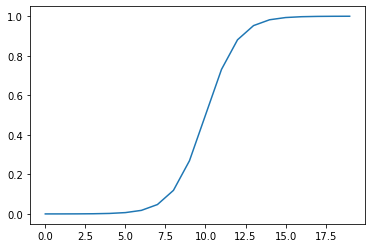

In [17]:
plt.plot(sigmoid(A))

Lets try reLU.

In [18]:
# Let create a relu activation function.
def relu(x):
  return tf.maximum(0, x)

In [19]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Looks exactly the same as we saw in tensorflow documentation.

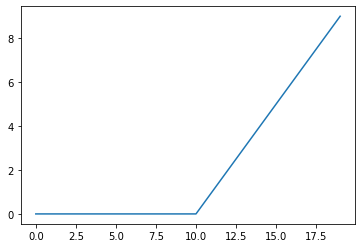

In [20]:
plt.plot(relu(A))

Now, lets try the linear activaion function.

In [21]:
def linear(x):
  return tf.keras.activations.linear(x)

In [22]:
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Looks like it returns the same thing.

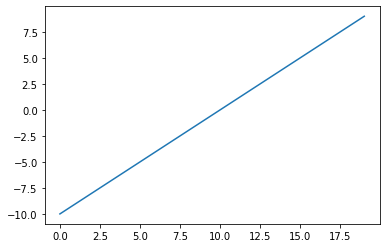

In [23]:
plt.plot(linear(A))

**Remember in our initial experimentations we used linear activation function, we as have visualized it above and looked into tensorflow documentation, now we know that it return the data unmodified. Therefore, we can iterpretate that we this is the resaon why our model was not able to learn the patterns. [TensorFlow/Linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)**

## **Evaluating and improving our classification model.**

So far we are using the same dataset for training and testing. Now its time to create training and test sets.

In [24]:
import tensorflow as tf

In [25]:
# Lets split the train and test sets by indexing, it's a good idea to use scikit learns train-test-split.
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [47]:
# Creating a model to fit on training data and evaluate on testing data.

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

In [48]:
# Fitting model_9.
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.6920 - accuracy: 0.5238
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5450
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5350
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5425
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5738
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6350
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.7312
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7975
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.8325
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.8988
Epoch 11/25
25/25 [

In [49]:
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9975


[0.06229858472943306, 0.9975000023841858]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


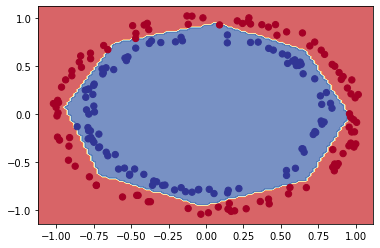

In [50]:
plot_decision_boundary(model_8, X_test, y_test)

**Things look very good now!**

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


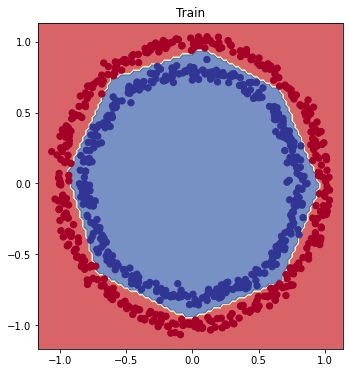

In [51]:
# PLot decision boundaries for thr training and test sets.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.show()

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


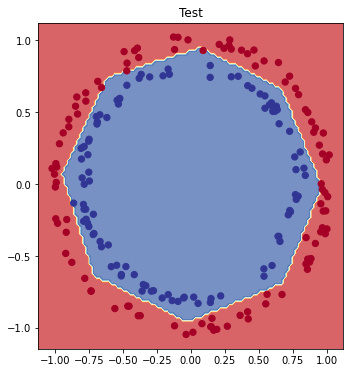

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or Training) curves.

In [53]:
# Converting history object into a DataFrame.
pd.DataFrame(history.history)

,loss,accuracy
0,0.691989,0.52375
1,0.686709,0.54500
2,0.681171,0.53500
3,0.674167,0.54250
4,0.664367,0.57375
5,0.648972,0.63500
6,0.624042,0.73125
7,0.585712,0.79750
8,0.535926,0.83250
9,0.472535,0.89875


Text(0.5, 1.0, 'model_8 loss curves')

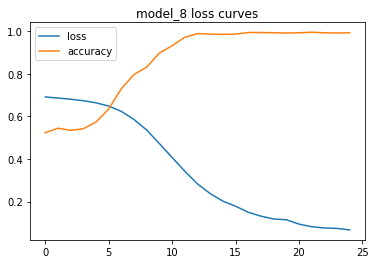

In [55]:
# Plot the loss curve.
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

### As you can see in the above visualization, the loss function is decresing and accuracy is increasing. This means our model is making predictions closer to the ground truth.